# 符号表示

* $X^{(i)}$ 表示第 $i$ 个样本，每一行都是一个样本
* $X_i$ 表示第 $i$ 个特征，每一列都是不同的特征

# 形式化定义

* 假设函数  

$$h_\theta(x)=\sum_{i=0}^n {\theta_ix_i}=\boldsymbol{\theta}^T\boldsymbol{x} ,其中x_0=1$$

* 损失函数  

$$L(\theta)=(h_\theta(x)-y)^2$$

* 代价函数  

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^m {(h_\theta(x^{(i)})-y^{(i)})^2}$$

# 梯度下降

## 梯度下降简介

例：求函数 $y=x^2$的最小值。  

它的导数为 $y^\prime=\nabla{y}=2x$。在 $(2,2)$ 这个点切线的斜率为 4，也就是这个点向上走的速度为 4；此时这个点向上走，到达 $(2.01,4.0401)$，$x$ 变化了 0.01，$y$ 变化了 0.04，$y$ 变化的速度是 $x$ 的 4 倍，也就是 $(2,2)$点的导数，因此导数代表了函数值上升的趋势。  

因为我们要求的是最小值，因此需要减小。同时为了避免减少太多超过最小值，需要设置步长 $\alpha$。于是就得到新的 $x$ 值： $x-\alpha y^\prime$。  

如此不断迭代，就得到了最小值。

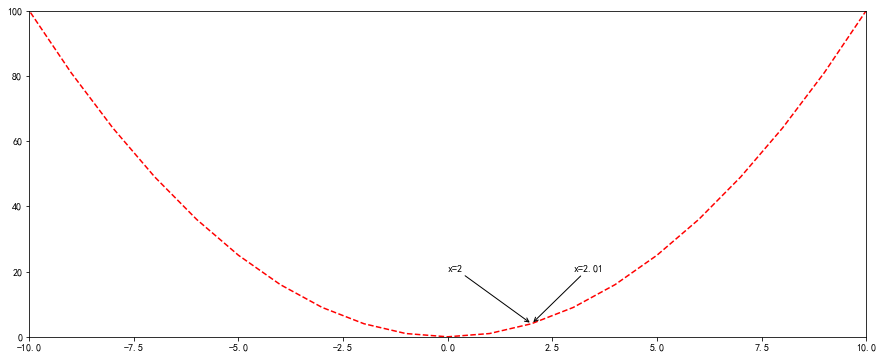

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 6))
a = np.arange(-100, 100, 1)
plt.plot(a, a*a, 'r--')
plt.axis([-10, 10, 0, 100])
plt.annotate("x=2", xy=(2, 4), xycoords='data', xytext=(
    0, 20), arrowprops=dict(arrowstyle='->'))
plt.annotate("x=2.01", xy=(2.01, 4.0401), xycoords='data',
             xytext=(3, 20), arrowprops=dict(arrowstyle='->'))
plt.show()

在线性回归中梯度下降法可用于求代价函数的最小值，具体步骤为：  
1. 随机初始化一个点 $\theta$
2. 设置步长 $\alpha$，设置迭代次数 $m$  
3. 求 $J(\theta)$ 的导数 $\nabla J(\theta)$，每一次迭代都对所有 $\theta$ 求导，同步更新每个 $\theta$  

$$
\begin{align}
for\quad & i=0 \quad to\quad m: \\\
& \theta :=\theta-\alpha\nabla J(\theta)
\end{align}
$$

若代价函数是凸函数，那么梯度下降法得到的是最小值；若代价函数不是凸函数，那么梯度下降法得到的最小值是一个局部最小值。  
<img align="center" src="img/梯度下降.png" style="width:550px">

## 梯度下降法代码实现

**求 $y=x^2+2x+5$ 的最小值**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

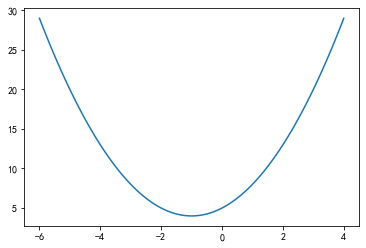

In [4]:
# 画函数图像
x = np.linspace(-6,4,100)
y = x**2+2*x+5
plt.figure(figsize=(6,4))
plt.plot(x,y)
plt.show()

In [5]:
# 初始化参数
x = random.randint(-6,4)
alpha = 0.8
iteraterNum = 100

In [6]:
# y的导数为2x+2，迭代求theta
for i in range(iteraterNum):
    x = x - alpha*(2*x+2)

In [7]:
print(x)

-1.0


## 梯度下降法求解线性回归问题

使用梯度下降法求解线性回归问题，也就是使代价函数损失值最小。  
对代价函数 $J(\theta)$ 的每个参数分别求偏导，并同步更新每个 $\theta$：  

$$
\begin{align}
\frac{\partial}{\partial \theta_j}J(\theta)&=\frac{\partial}{\partial \theta_j}\frac{1}{2m}\sum_{i=1}^m {(h_\theta(x^{(i)})-y^{(i)})^2} \\\
&=2\times\frac{1}{2m}\sum_{i=1}^m {[(h_\theta(x^{(i)})-y^{(i)})\frac{\partial}{\partial \theta_j}(h_\theta(x^{(i)})-y^{(i)})]} \\\
&=\frac{1}{m}\sum_{i=1}^m {[(h_\theta(x^{(i)})-y^{(i)})\frac{\partial}{\partial \theta_j}(\sum_{f=0}^n {\theta_fx_f^{(i)}-y^{(i)}})]} \\\
&=\frac{1}{m}\sum_{i=1}^m {[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]} \\\
\theta_j&:=\theta_j+\alpha\frac{1}{m}\sum_{i=1}^m {(y^{(i)}-h_\theta(x^{(i)})x_j^{(i)}}
\end{align}
$$

## 线性回归代码实现

**1. 定义一个加载数据的函数**

In [8]:
def loaddata(path):
    data = np.loadtxt(path,delimiter=',')
    n = data.shape[1] - 1     # 特征数
    X = data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y

**2. 特征归一化**

In [9]:
def featureNormalize(X):
    mu = np.average(X,axis=0)
    sigma = np.std(X,axis=0,ddof=1)
    X = (X-mu)/sigma
    
    return X,mu,sigma

**3. 计算损失函数**

$$L(\theta)=(h_\theta(x)-y)^2$$

In [10]:
def computeCost(X,y,theta):
    m = X.shape[0]
    return np.sum(np.power(y-np.dot(X,theta),2))/(2*m)

**4. 梯度下降法求解**

$$\theta_j:=\theta_j+\alpha\frac{1}{m}\sum_{i=1}^m {(y^{(i)}-h_\theta(x^{(i)})x_j^{(i)}}$$

In [11]:
def gradientDescent(X,y,theta,alpha,iteraterNum):
    m = X.shape[0]     # m条数据
    c = np.ones(m).transpose()
    X = np.insert(X,0,values=c,axis=1)    # 插入第一列全为1
    n = X.shape[1]     # n个特征    
    costs = np.zeros(iteraterNum)
    
    for i in range(iteraterNum):
        for j in range(n):
            theta[j] = theta[j] + (alpha/m) * np.sum((y - np.dot(X,theta)) * X[:,j].reshape(-1,1)) 
        costs[i] = computeCost(X,y,theta)
        
    return theta,costs

In [12]:
X_origin, y = loaddata("data/data1.txt")
X,mu,sigma = featureNormalize(X_origin)
theta = np.zeros(X.shape[1]+1).reshape(-1,1)   
alpha = 0.01
iteraterNum = 400
theta,costs = gradientDescent(X,y,theta,alpha,iteraterNum)
print(theta)

[[5.73431935]
 [4.53050051]]


**5. 画损失函数图**

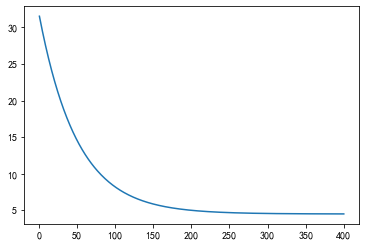

In [13]:
x_axis = np.arange(1,iteraterNum+1,1)
plt.plot(x_axis,costs)

**6. 画数据散点图和求得的直线**

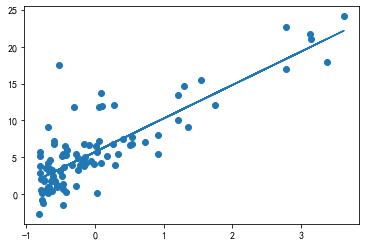

In [14]:
plt.scatter(X,y)
h_theta = theta[0] + theta[1]*X
plt.plot(X,h_theta)

**7. 预测数据**

In [15]:
def predict(X,mu,sigma):
    X = (X-mu)/sigma
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values=c,axis=1)
    return np.dot(X,theta)

In [16]:
print(predict([[8.5781]],mu,sigma))

[[6.22402617]]


## 几种梯度下降法

**1. 批量梯度下降（BGD）**：每次用所有样本进行更新，计算量大  

$$\theta_j:=\theta_j+\alpha\frac{1}{m}\sum_{i=1}^m {(y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)}}$$
**2. 随机梯度下降（SGD）**：每次随机选择一个样本，计算量小，但结果不稳定  

$$\theta_j:=\theta_j+\alpha(y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)}$$
**3. 小批量梯度下降（MBGD）**：每次使用batch_size个样本进行更新  

$$\theta_j:=\theta_j+\frac{\alpha}{batch-num}\sum_{i=1}^{batch-num} {(y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)}}$$

# 模型评价

In [17]:
y_true = np.array([1,2,3,4,5])
y_pred = np.array([1.1,2.2,3.1,4.2,5])

## 均方误差（MSE）

$$MSE=\frac{1}{m}\sum_{i=1}^m {(y^{(i)}-\hat{y}^{(i)})^2}$$

In [18]:
def mse(y_true,y_pred):
    return np.sum(np.power(y_true-y_pred,2))/len(y_true)

In [19]:
mse(y_true,y_pred)

0.020000000000000035

In [20]:
model_predict = predict(X_origin,mu,sigma)
mse(y,model_predict)

8.972317211137899

## 均方根误差（RMSE）

$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^m {(y^{(i)}-\hat{y}^{(i)})^2}}$$

In [21]:
def rmse(y_true,y_pred):
    return np.sqrt(np.sum(np.power(y_true-y_pred,2))/len(y_true))

In [22]:
rmse(y_true,y_pred)

0.14142135623730964

In [23]:
rmse(y,model_predict)

2.9953826485338895

## 平均绝对误差（MAE）

$$MAE=\frac{1}{m}\sum_{i=1}^m \left\vert y^{(i)}-\hat{y}^{(i)} \right\vert$$

In [24]:
def mae(y_true,y_pred):
    return np.sum(np.abs(y_true-y_pred))/len(y_true)

In [25]:
mae(y_true,y_pred)

0.1200000000000001

In [26]:
mae(y,model_predict)

2.179721773837948

# 正则化

## 岭回归

L2范数正则化解决过拟合（Ridge Regression 岭回归）  

目标函数：  

$$
\begin{align}
J(\theta)&=\frac{1}{2m}\sum_{i=1}^m {(h_\theta(x^{(i)})-y^{(i)})^2}+\lambda {\left \| \theta \right \|}_2^2 \\\
&=\frac{1}{2m}\sum_{i=1}^m {(h_\theta(x^{(i)})-y^{(i)})^2}+\lambda \sum_{j=1}^n \theta_j^2
\end{align}
$$

岭回归求解：  

$$
\begin{align}
\frac{\partial}{\partial \theta_j}J(\theta)&=\frac{\partial}{\partial \theta_j}\frac{1}{2m}\sum_{i=1}^m {(h_\theta(x^{(i)})-y^{(i)})^2}+\lambda \sum_{j=1}^n \theta_j^2 \\\
&=\frac{1}{m}\sum_{i=1}^m {[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]}+2\lambda\theta_j
\end{align}
$$

迭代公式：  

$$
\begin{align}
\theta_j&:=\theta_j+\alpha\frac{1}{m}\sum_{i=1}^m {(y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)}}-2\lambda\theta_j \\\
&=(1-2\lambda)\theta_j+\alpha\frac{1}{m}\sum_{i=1}^m {(y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)}}
\end{align}
$$

当 $\lambda$ 取较小值时，$(1-2\lambda)$ 一定是小于1的正数或者负数，经过多次迭代，$\lambda$会越来越小。  
当 $\theta_j$ 较小时，说明该特征对结果的影响较小，而岭回归通过惩罚参数 $\lambda$ 使得某些系数变得很小，从而简化模型，降低了过拟合的风险。  
$\lambda$ 越大，惩罚力度越大，模型越简单；$\lambda$ 越小，惩罚力度越小，模型越复杂。

In [27]:
def gradientDescent_ridge(X,y,theta,alpha,iteraterNum,lamda=0.02):
    m = X.shape[0]     
    c = np.ones(m).transpose()
    X = np.insert(X,0,values=c,axis=1)    
    n = X.shape[1]         
    costs = np.zeros(iteraterNum)
    
    for i in range(iteraterNum):
        for j in range(n):
            theta[j] = theta[j] + (alpha/m) * np.sum((y - np.dot(X,theta)) * X[:,j].reshape(-1,1)) -2*lamda*theta[j]
        costs[i] = computeCost(X,y,theta)
        
    return theta,costs

In [28]:
theta,costs = gradientDescent_ridge(X,y,theta,alpha,iteraterNum,0.001)
#theta,costs = gradientDescent_ridge(X,y,theta,alpha,iteraterNum,0.005)  
print(theta)

[[4.87288787]
 [3.84649878]]


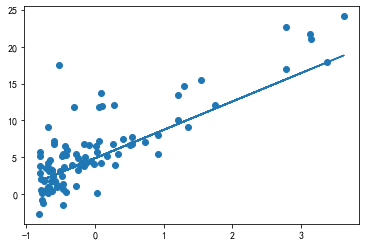

In [29]:
plt.scatter(X,y)
h_theta = theta[0] + theta[1]*X
plt.plot(X,h_theta)

## LASSO回归

L1范数正则化解决过拟合（LASSO回归）：  
目标函数：
$$
\begin{align}
J(\theta)&=\frac{1}{2m}\sum_{i=1}^m {(h_\theta(x^{(i)})-y^{(i)})^2}+\lambda {\left| \theta \right|}_1  \\\
&=\frac{1}{2m}\sum_{i=1}^m {(h_\theta(x^{(i)})-y^{(i)})^2}+\lambda \sum_{j=1}^n \left| \theta_j \right| 
\end{align} 
$$

LASSO求解，为了便于计算，将目标函数变为以下形式：  

$$
J(\theta)=\sum_{i=1}^m {(y^{(i)}-\sum_{j=0}^n\theta_jx_j^{(i)})^2}+\lambda \sum_{j=1}^n \left| \theta_j \right| \qquad (\lambda>0)
$$

残差部分求导：  

$$
\begin{align}
\frac{\partial}{\partial \theta_k}RSS(\theta)&=2\sum_{i=1}^m {(y^{(i)}-\sum_{j=0}^n\theta_jx_j^{(i)})(-x_k^{(i)})} \\\
&=-2\sum_{i=1}^m (x_k^{(i)}y^{(i)}-x_k^{(i)}\sum_{j=0}^n \theta_jx_j^{(i)}) \\\
&=-2\sum_{i=1}^m (x_k^{(i)}y^{(i)}-x_k^{(i)}\sum_{j=0,j\ne k}^n \theta_jx_j^{(i)} - \theta_kx_k^{(i)^2}) \\\
&=-2\sum_{i=1}^m [(x_k^{(i)}(y^{(i)}-\sum_{j=0,j\ne k}^n \theta_jx_j^{(i)})]+2\theta_k \sum_{i=1}^m x_k^{(i)^2} \\\
令:p_k&=\sum_{i=1}^m [(x_k^{(i)}(y^{(i)}-\sum_{j=0,j\ne k}^n \theta_jx_j^{(i)})] \\\
z_k &= \sum_{i=1}^m x_k^{(i)^2} \\\
则:\frac{\partial}{\partial \theta_k}&RSS(\theta) = -2p_k+2\theta_kz_k
\end{align}
$$

对正则项求偏导：  

$$
\frac{\partial}{\partial \theta_k}R(\theta)=
\begin{cases} 
-\lambda,  & \theta_k<0 \\
[-\lambda,\lambda], & \theta_k=0 \\
\lambda, & \theta_k>0
\end{cases}
$$

整体求偏导：  

$$
\begin{align}
    \frac{\partial}{\partial \theta_k}J(\theta)&=-2p_k+2\theta_kz_k+
    \begin{cases} 
    -\lambda,  & \theta_k<0 \\
    [-\lambda,\lambda], & \theta_k=0 \\
    \lambda, & \theta_k>0
    \end{cases} \\\
    &=
    \begin{cases} 
    -2p_k+2\theta_kz_k-\lambda,  & \theta_k<0 \\
    [-2p_k-\lambda,-2p_k+\lambda], & \theta_k=0 \\
    -2p_k+2\theta_kz_k+\lambda, & \theta_k>0
    \end{cases}
\end{align}
$$

令：$\frac{\partial}{\partial \theta_k}J(\theta)=0$ 得到最终迭代公式：  

$$
\theta_k=
\begin{cases} 
(p_k+\lambda/2)/z_k,  & p_k<-\lambda/2 \\
0, & -\lambda/2\le p_k \le \lambda/2 \\
(p_k-\lambda/2)/z_k, & p_k>\lambda/2
\end{cases}
$$

In [30]:
def lasso_regression(X,y,theta,iteraterNum,lamda=0.2):
    m = X.shape[0]     # m条数据
    X = np.insert(X,0,values=1,axis=1)    # 插入第一列全为1
    n = X.shape[1]     # n个特征    
    costs = np.zeros(iteraterNum)
    
    for i in range(iteraterNum):
        for k in range(n):
            z_k = np.sum(X[:,k]**2)
            p_k = 0
            for s in range(m):
                p_k += X[s,k]*(y[s,0]-[theta[j,0]*X[s,j] for j in range(n) if j != k])
            if p_k < -lamda/2:
                theta[k,0] = (p_k+lamda/2)/z_k
            elif p_k > lamda/2:
                theta[k,0] = (p_k-lamda/2)/z_k
            else:
                theta[k,0] = 0
            
        costs[i] = computeCost(X,y,theta)
        
    return theta,costs

[[5.83810412]
 [4.61585958]]


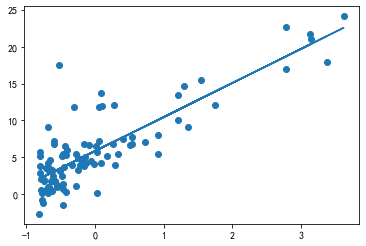

In [31]:
theta,costs = lasso_regression(X,y,theta,100)
print(theta)
plt.scatter(X,y)
h_theta = theta[0] + theta[1]*X
plt.plot(X,h_theta)

## Elastic Net

L1与L2结合解决过拟合（Elastic Net 弹性网）：

$$
J(\theta)=\frac{1}{2m}\sum_{i=1}^m {(h_\theta(x^{(i)})-y^{(i)})^2}+\lambda (\rho{\left| \theta \right|}_1 + (1-\rho){\left \| \theta \right \|}_2^2 )\qquad (\lambda>0,0\le\rho\le1)
$$

# 最小二乘法

$$
\begin{align}
J(\theta)&=\frac{1}{2}\sum_{i=1}^m {(h_\theta(x^{(i)})-y^{(i)})^2} \\\
&=\frac{1}{2}(X\theta-y)^T(X\theta-y) \\\
&=\frac{1}{2}(\theta^TX^T-y^T)(X\theta-y) \\\
&=\frac{1}{2}(\theta^TX^TX\theta-\theta^TX^Ty-y^TX\theta-y^Ty)
\end{align}
$$

矩阵求导法则：  

$$\frac{\partial(\theta^TA\theta)}{\partial \theta}=2A\theta$$
$$\frac{\partial(\theta^TA)}{\partial \theta}=A$$
$$\frac{\partial(A\theta)}{\partial \theta}=A^T$$

对代价函数求导：  

$$
\begin{align}
\frac{\partial J}{\partial \theta}&=\frac{1}{2}(2X^TX\theta-X^Ty-(y^TX)^T) \\\
&=X^TX\theta-X^Ty 
\end{align}
$$

$$
令\frac{\partial J}{\partial \theta}=0\Rightarrow\theta=(X^TX)^{-1}X^Ty
$$

注意：  
* 数据量较大时，求逆矩阵计算量很大，建议用梯度下降
* 逆矩阵有可能不存在，可以计算 $(X^TX+\lambda I)^{-1}X^Ty$

In [32]:
X_1 = np.insert(X,0,values=1,axis=1)
theta = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T).dot(y)
print(theta)

[[5.83913505]
 [4.61690125]]


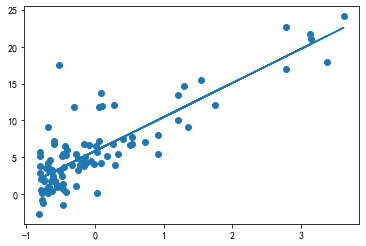

In [33]:
plt.scatter(X,y)
h_theta = theta[0] + theta[1]*X
plt.plot(X,h_theta)

# 使用Sklearn实现线性回归

## 线性回归（最小二乘实现）

In [34]:
from sklearn import linear_model

In [46]:
model1 = linear_model.LinearRegression()
model1.fit(X_origin,y)
# 输出系数
print(model1.coef_)
# 输出截距
print(model1.intercept_)

[[1.19303364]]
[-3.89578088]


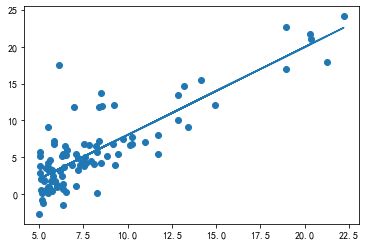

In [47]:
plt.scatter(X_origin,y)
# 预测
y_hat = model1.predict(X_origin)
plt.plot(X_origin,y_hat)

## Ridge

参数alpha表示正则化强度，即惩罚系数 $\lambda$，normalize表示是否对数据标准化

In [50]:
model2 = linear_model.Ridge(alpha=0.01,normalize=True)
model2.fit(X_origin,y)
# 输出系数
print(model2.coef_)
# 输出截距
print(model2.intercept_)

[[1.18122143]]
[-3.79939557]


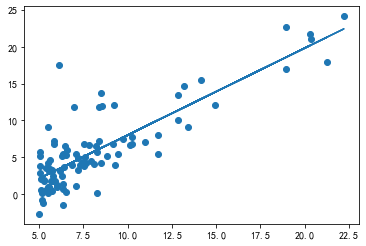

In [52]:
plt.scatter(X_origin,y)
# 预测
y_hat = model2.predict(X_origin)
plt.plot(X_origin,y_hat)

## LASSO

In [53]:
model3 = linear_model.Lasso(alpha=0.01,normalize=True)
model3.fit(X_origin,y)
# 输出系数
print(model3.coef_)
# 输出截距
print(model3.intercept_)

[1.16745142]
[-3.68703508]


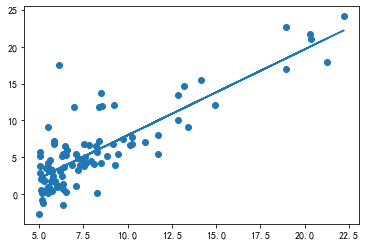

In [54]:
plt.scatter(X_origin,y)
# 预测
y_hat = model3.predict(X_origin)
plt.plot(X_origin,y_hat)

## Elastic Net

In [55]:
model4 = linear_model.ElasticNet(alpha=0.01,normalize=True)
model4.fit(X_origin,y)
# 输出系数
print(model4.coef_)
# 输出截距
print(model4.intercept_)

[0.79477612]
[-0.64607911]


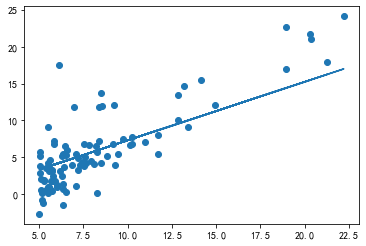

In [56]:
plt.scatter(X_origin,y)
# 预测
y_hat = model4.predict(X_origin)
plt.plot(X_origin,y_hat)

# 案例：波士顿房价预测

## 机器学习项目流程

1. 获取数据
2. 数据预处理（数据清洗）
3. 数据分析与可视化
4. 选择合适的机器学习模型
5. 训练模型（使用交叉验证选择合适的参数）
6. 评价模型
7. 上线部署使用模型

## 数据集的分割

* 训练集：用于训练模型
* 验证集：用于选择参数
* 测试集：用于评价模型的泛化能力

## 获取数据

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split    # 数据集划分
from sklearn.model_selection import GridSearchCV        # 交叉验证
from sklearn.metrics import mean_squared_error          # 均方误差
from sklearn.metrics import mean_absolute_error         # 绝对误差
import joblib                                           # 模型保存

### sklearn内置

In [61]:
boston = load_boston()

**特征含义**  
CRIM：城镇人均犯罪率。<br/>
ZN：住宅用地超过 25000 sq.ft. 的比例。<br/>
INDUS：城镇非零售商用土地的比例。<br/>
CHAS：查理斯河空变量（如果边界是河流，则为1；否则为0）。<br/>
NOX：一氧化氮浓度。<br/>
RM：住宅平均房间数。<br/>
AGE：1940 年之前建成的自用房屋比例。<br/>
DIS：到波士顿五个中心区域的加权距离。<br/>
RAD：辐射性公路的接近指数。<br/>
TAX：每 10000 美元的全值财产税率。<br/>
PTRATIO：城镇师生比例。<br/>
B：1000（Bk-0.63）^ 2，其中 Bk 指代城镇中黑人的比例。<br/>
LSTAT：人口中地位低下者的比例。<br/>
MEDV：自住房的平均房价，以千美元计。<br/>

In [63]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 从文件读取

In [65]:
df = pd.read_excel("data/boston.xls")
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [68]:
X = df[df.columns[1:-1]]
y = df['price']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [69]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

## 数据预处理（数据清洗）

我们获取的数据有可能存在下面的一些情况：
  - 缺少数据值
  - 含有错误的数据值，如年龄=200
  - 数据不一致，等级编码有的是“1，2，3”有的却是“A，B，C ”
  - 重复的记录值

## 选择合适的机器学习模型

该问题是房价预测问题，线性回归能很好的应用于预测问题，因此我们选择使用线性回归模型

## 训练模型（使用交叉验证选择参数）

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)    # 训练集：测试集=8：2

* cv：几折交叉验证
* estimator：使用的模型
* param_grid：要验证的参数
* scoring：评价准则

In [74]:
ridge_model = linear_model.Ridge()
param = {'alpha':[0.01,0.03,0.05,0.07,0.1,0.5,0.8,1],'normalize':[True,False]}
gsearch = GridSearchCV(estimator=ridge_model,param_grid=param,cv=5,scoring='neg_mean_squared_error')
gsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.03, 0.05, 0.07, 0.1, 0.5, 0.8, 1],
                         'normalize': [True, False]},
             scoring='neg_mean_squared_error')

In [75]:
gsearch.best_params_,gsearch.best_score_

({'alpha': 0.05, 'normalize': True}, -25.15807580041446)

## 模型评价

In [80]:
final_model = linear_model.Ridge(alpha=0.05,normalize=True)
final_model.fit(X_train,y_train)
y_train_hat = final_model.predict(X_train)
y_test_hat = final_model.predict(X_test)
print("train-MSE:",mean_squared_error(y_train,y_train_hat))
print("test-MSE：",mean_squared_error(y_test,y_test_hat))

train-MSE: 22.43305929506002
test-MSE： 22.002889735839197


## 上线部署使用

### 模型保存

In [83]:
joblib.dump(final_model,"data/house_train_model.m")

['data/house_train_model.m']

### 模型读取

In [84]:
load_model = joblib.load("data/house_train_model.m")
load_model.predict(X_test)

array([20.76635523, 15.31056783, 28.45302143, 24.44121754, 31.26785388,
       20.87699926, 15.78266459, 22.37976666, 27.43619086, 27.52030567,
       21.77486525, 20.19291889, 31.09058216, 12.80715614, 20.78488232,
       33.68289896, 23.06042457, 24.33456746, 28.878773  , 34.4895431 ,
       33.44523259, 22.15792723, 31.59484957, 25.51505877, 21.42113832,
       19.53863162, 13.91122723, 23.951555  , 13.05951332, 30.36299095,
       29.6685229 , 16.79230364, 19.67725141, 24.11880745, 29.55661058,
       11.69386303, 19.89901468, 29.8500251 , 14.59199151, 18.08408958,
       21.38407458, 16.34726684, 16.62810366,  7.6663263 , 29.19524123,
       22.48165364, 24.75148179, 28.92616887, 32.34901626, 25.81409695,
       23.03536277, 34.78207076, 24.88276817, 32.40762696, 22.50458513,
       13.11130403, 28.45875186,  5.39432067, 19.07283856, 29.8521073 ,
        8.91338399, 35.61997743, 17.83536496, 28.78193016, 18.96580463,
       25.08831469, 28.27361933, 13.74337252, 10.32638231, 15.80